(50, 2)


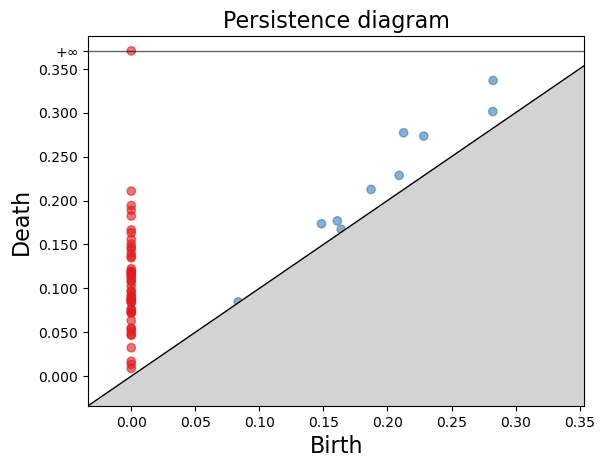

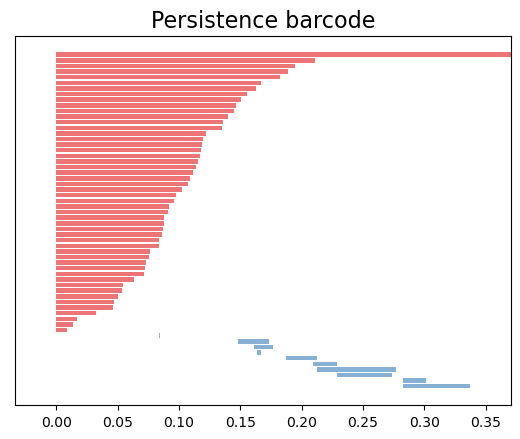

In [76]:
import numpy as np
import gudhi as gd
from ripser import Rips

np.random.seed(0)
n_points = 25

# Angles for each point on the circle
angles = np.linspace(0, 2*np.pi, n_points, endpoint=False)

# Coordinates for each point on the circle
x_coords = np.cos(angles)
y_coords = np.sin(angles)

# Combine x and y coordinates into a 2D array
circle_points = np.column_stack((x_coords, y_coords))
data = np.random.rand(50, 2)
# data = np.append(circle_points, np.column_stack((2*x_coords, 2*y_coords)), axis=0)
print(data.shape)

rips_complex = gd.RipsComplex(points=data, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=4)
persistence = simplex_tree.persistence()

gd.plot_persistence_diagram(persistence=persistence)
gd.plot_persistence_barcode(persistence=persistence)


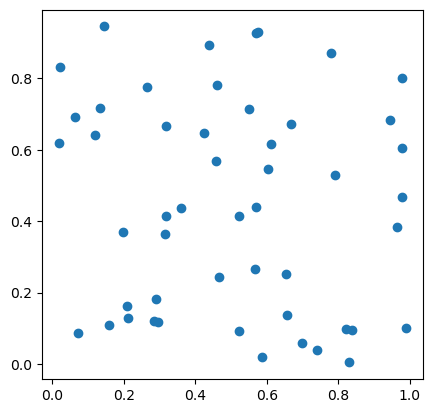

In [79]:
fig, ax = plt.subplots()
# for i in range(len(centers)):
#     ax.scatter(x[:, i], y[:, i])
# for idx, p in enumerate(data):
#     ax.scatter(p[0], p[1])
ax.scatter(data[:,0], data[:,1])
ax.set_aspect('equal')
plt.show()

Rips(maxdim=3, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


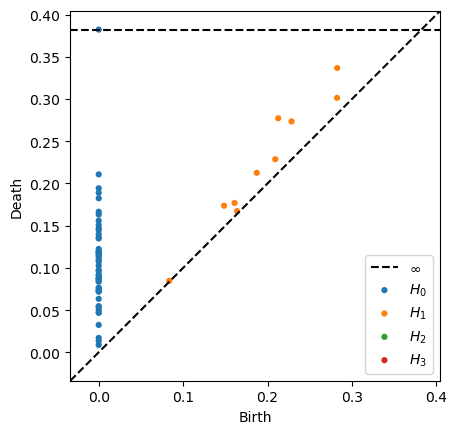

In [80]:
rips = Rips(maxdim=3)
dgms = rips.fit_transform(data, distance_matrix = False)
H0_dgm = dgms[0]
rips.plot(dgms, legend=True, show=False)


In [ ]:
# print([i for i in persistence if i[0] == 1])
for idx, (dim,(b, d)) in enumerate([i for i in persistence]):
    print(idx, dim, b, d)

In [16]:
pairs = simplex_tree.persistence_pairs()
print([p for p in pairs if len(p[0]) >= 1])

[([23], [23, 22]), ([18], [18, 17]), ([20], [20, 19]), ([24], [24, 0]), ([10], [10, 9]), ([5], [5, 4]), ([8], [8, 7]), ([9], [9, 8]), ([13], [13, 12]), ([15], [15, 14]), ([16], [16, 15]), ([3], [3, 2]), ([12], [12, 11]), ([1], [1, 0]), ([2], [2, 1]), ([4], [4, 3]), ([6], [6, 5]), ([7], [7, 6]), ([11], [11, 10]), ([14], [14, 13]), ([17], [17, 16]), ([19], [19, 18]), ([22], [22, 21]), ([0], [24, 23]), ([48], [48, 47]), ([43], [43, 42]), ([45], [45, 44]), ([49], [49, 25]), ([35], [35, 34]), ([30], [30, 29]), ([33], [33, 32]), ([34], [34, 33]), ([38], [38, 37]), ([40], [40, 39]), ([41], [41, 40]), ([28], [28, 27]), ([37], [37, 36]), ([26], [26, 25]), ([27], [27, 26]), ([29], [29, 28]), ([31], [31, 30]), ([32], [32, 31]), ([36], [36, 35]), ([39], [39, 38]), ([42], [42, 41]), ([44], [44, 43]), ([47], [47, 46]), ([25], [49, 48]), ([46], [30, 5]), ([48, 23], [48, 47, 22]), ([26, 1], [26, 25, 0]), ([29, 4], [29, 28, 3]), ([28, 3], [30, 29, 4]), ([33, 8], [33, 32, 8]), ([34, 9], [34, 33, 9]), ([

In [ ]:
filtration = simplex_tree.get_filtration()
for simplex, filtration_value in filtration:
    print(simplex, filtration_value)

In [ ]:
simplices = simplex_tree.get_simplices()
for simplex in simplices:
    print(simplex)

In [ ]:
skeletons = simplex_tree.get_skeleton(2)
for skeleton in skeletons:
    print(skeleton)

In [81]:
count = 0
rips_complex = gd.RipsComplex(points=data, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

# gd.plot_persistence_diagram(persistence=persistence)
pairs = simplex_tree.persistence_pairs()
filtration = simplex_tree.get_filtration()


In [82]:

for birth_value, death_value in [i[1] for i in persistence]:
    filtration = simplex_tree.get_filtration()
    tolerance = 1e-6
    birth_simplices = []
    death_simplices = []

    for simplex, filtration_value in filtration:
        # print(filtration_value, birth_value)
        if abs(filtration_value - birth_value) < tolerance:
            # print(simplex)
            birth_simplices.append(simplex)
        elif abs(filtration_value - death_value) < tolerance or (death_value == np.Inf):
            death_simplices.append(simplex)
    # print(birth_simplices)

    involved_points = set()

    for birth_simplex in birth_simplices:
        for death_simplex in death_simplices:
            if set(birth_simplex).issubset(death_simplex):
                involved_points.update(birth_simplex)
                involved_points.update(death_simplex)

    if len(involved_points) >= 0 : print(count, birth_value, death_value, involved_points) 
    count += 1
    
        

0 0.21261486295550386 0.2772070024669856 set()
1 0.28247963585200525 0.3367240083949339 set()
2 0.2283809164276244 0.2734045308400464 {9, 22, 6}
3 0.18720282235255045 0.2126152063778792 set()
4 0.14849250217301266 0.17356156244458887 set()
5 0.20913672638710537 0.22863391198881627 {13, 46, 15}
6 0.2822752596841556 0.3013388977540022 {32, 40, 12}
7 0.1608962821200896 0.17684532835452127 {42, 43, 29}
8 0.16387443322709166 0.1672185891076738 {16, 20, 14}
9 0.08344932112406117 0.08459285216085252 {27, 38, 47}
10 0.0 inf {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
11 0.0 0.2107215838286716 {9, 44}
12 0.0 0.19430932572721465 {35, 5}
13 0.0 0.18895937720249817 {5, 22}
14 0.0 0.1823853473079595 {24, 47}
15 0.0 0.1664848207855296 {8, 13}
16 0.0 0.16311420508962493 {16, 20}
17 0.0 0.1558367957524027 {42, 14}
18 0.0 0.15054641429291893 {26, 34}
19 0.0 

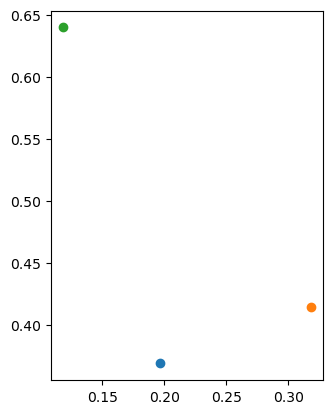

In [83]:
concern_points = list({32, 40, 12})
fig, ax = plt.subplots()
# for i in range(len(centers)):
#     ax.scatter(x[:, i], y[:, i])
for idx, p in enumerate([data[i] for i in concern_points]):
    ax.scatter(p[0], p[1])
ax.set_aspect('equal')
plt.show()

In [23]:
count = 0
from scipy.spatial import distance_matrix
dist_mat = distance_matrix(data, data)
rips_complex = gd.RipsComplex(distance_matrix=dist_mat, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

# gd.plot_persistence_diagram(persistence=persistence)
pairs = simplex_tree.persistence_pairs()
filtration = simplex_tree.get_filtration()


In [24]:

for birth_value, death_value in [i[1] for i in persistence]:
    filtration = simplex_tree.get_filtration()
    tolerance = 1e-6
    birth_simplices = []
    death_simplices = []

    for simplex, filtration_value in filtration:
        # print(filtration_value, birth_value)
        if abs(filtration_value - birth_value) < tolerance:
            # print(simplex)
            birth_simplices.append(simplex)
        elif abs(filtration_value - death_value) < tolerance or (death_value == np.Inf):
            death_simplices.append(simplex)
    # print(birth_simplices)

    involved_points = set()

    for birth_simplex in birth_simplices:
        for death_simplex in death_simplices:
            if set(birth_simplex).issubset(death_simplex):
                involved_points.update(birth_simplex)
                involved_points.update(death_simplex)

    if len(involved_points) >= 0 : print(count, birth_value, death_value, involved_points) 
    count += 1
    
        

0 1.809654104932039 1.8096541049320392 set()
1 1.809654104932039 1.8096541049320392 set()
2 1.809654104932039 1.8096541049320392 set()
3 1.809654104932039 1.8096541049320392 set()
4 0.2506664671286089 1.809654104932039 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
5 0.5013329342572178 1.0609747195317503 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
6 1.0 1.0609747195317503 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
7 1.0 1.0609747195317503 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
8 0.9999999999999999 1.0609

In [21]:
concern_points = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
list(concern_points)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [10]:
deleted_data = np.delete(data, list(concern_points), axis=0)

In [11]:
print(data.shape, deleted_data.shape)

(100, 2) (90, 2)


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


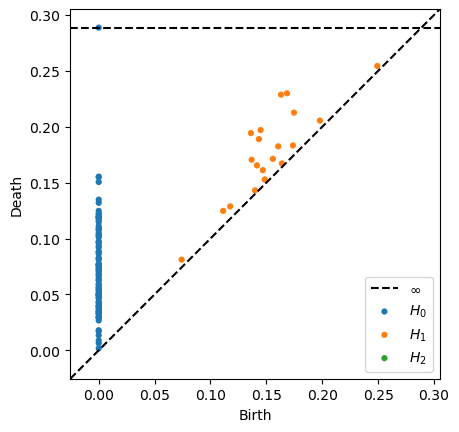

In [12]:
rips = Rips(maxdim=2)
dgms = rips.fit_transform(deleted_data, distance_matrix = False)
H0_dgm = dgms[0]
H1_dgm = dgms[1]
rips.plot(dgms, legend=True, show=False)


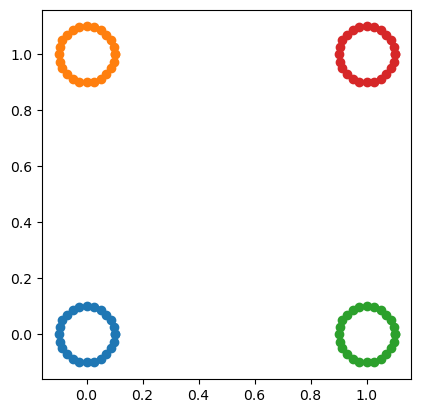

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Set the radius and center coordinates for the circles
radius = 0.1
centers = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])

# Generate the x and y coordinates for each circle
theta = np.linspace(0, 2*np.pi, n_points)
x = radius * np.cos(theta)[:, np.newaxis] + centers[:, 0]
y = radius * np.sin(theta)[:, np.newaxis] + centers[:, 1]

# Plot the circles
fig, ax = plt.subplots()
for i in range(len(centers)):
    ax.scatter(x[:, i], y[:, i])
quattro = np.empty((0,2))
for i in range(len(centers)):
    quattro = np.append(quattro,np.column_stack((x[:, i], y[:, i])),axis=0)
# for idx, p in enumerate(quattro):
#     ax.scatter(p[0], p[1])
ax.set_aspect('equal')
plt.show()



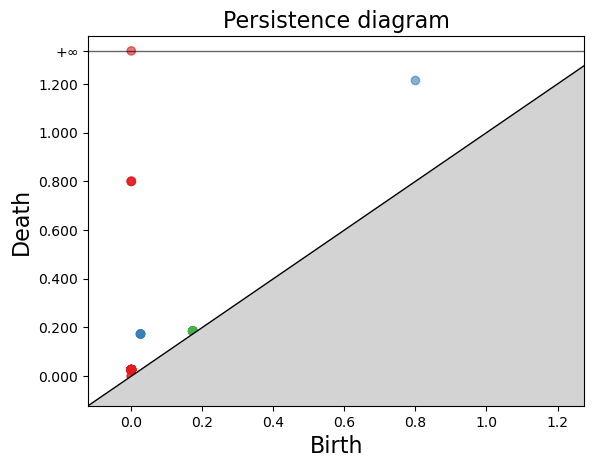

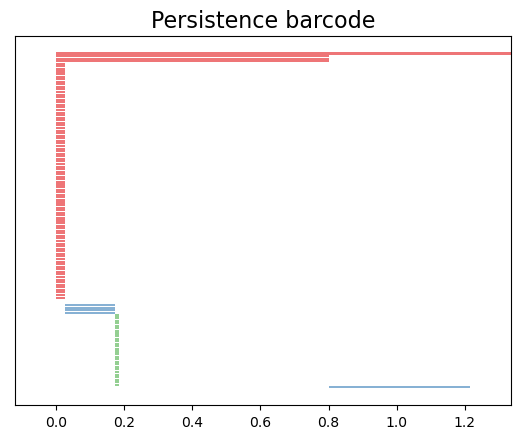

In [102]:
rips_complex = gd.RipsComplex(points=quattro, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

gd.plot_persistence_diagram(persistence=persistence)
gd.plot_persistence_barcode(persistence=persistence)


In [103]:
pairs = simplex_tree.persistence_pairs()
print([p for p in pairs if len(p[0]) >= 1])
print([p for p in pairs if (len(p[0]) >= 1) and (43 in p[0]+p[1])])

[([24], [24, 0]), ([74], [74, 50]), ([70], [70, 69]), ([95], [95, 94]), ([97], [97, 96]), ([72], [72, 71]), ([65], [65, 64]), ([29], [29, 28]), ([47], [47, 46]), ([39], [39, 38]), ([53], [53, 52]), ([58], [58, 57]), ([92], [92, 91]), ([48], [48, 47]), ([67], [67, 66]), ([34], [34, 33]), ([44], [44, 43]), ([63], [63, 62]), ([78], [78, 77]), ([79], [79, 78]), ([84], [84, 83]), ([90], [90, 89]), ([22], [22, 21]), ([23], [23, 22]), ([42], [42, 41]), ([10], [10, 9]), ([13], [13, 12]), ([19], [19, 18]), ([17], [17, 16]), ([20], [20, 19]), ([15], [15, 14]), ([45], [45, 44]), ([60], [60, 59]), ([83], [83, 82]), ([89], [89, 88]), ([98], [98, 97]), ([88], [88, 87]), ([94], [94, 93]), ([5], [5, 4]), ([8], [8, 7]), ([1], [1, 0]), ([2], [2, 1]), ([4], [4, 3]), ([7], [7, 6]), ([26], [26, 25]), ([32], [32, 31]), ([38], [38, 37]), ([41], [41, 40]), ([57], [57, 56]), ([69], [69, 68]), ([37], [37, 36]), ([51], [51, 50]), ([56], [56, 55]), ([76], [76, 75]), ([81], [81, 80]), ([82], [82, 81]), ([87], [87,

In [104]:

from scipy.spatial import distance_matrix
dist_mat = distance_matrix(data, data)
rips_complex = gd.RipsComplex(points=quattro, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

# gd.plot_persistence_diagram(persistence=persistence)
pairs = simplex_tree.persistence_pairs()
filtration = simplex_tree.get_filtration()


# problem
for each (birth_value, death_value) bar with same value, the related points were all added up into one bd group
# thought
how to find the potential chain in bd pairs

In [130]:
count = 0
for birth_value, death_value in [i[1] for i in persistence if i[0] == 1]:
    print(birth_value, death_value)
    filtration = simplex_tree.get_filtration()
    tolerance = 1e-6
    birth_simplices = []
    death_simplices = []

    for simplex, filtration_value in filtration:
        # print(filtration_value, birth_value)
        if abs(filtration_value - birth_value) < tolerance:
            # print("b simplex",simplex)
            birth_simplices.append(simplex)
        elif abs(filtration_value - death_value) < tolerance or (death_value == np.Inf):
            # print("d simplex",simplex)
            death_simplices.append(simplex)
    print("b simplex", birth_simplices)
    print("d simplex", death_simplices)

    involved_points_b = set()
    involved_points_d = set()


    for birth_simplex in birth_simplices:
        for death_simplex in death_simplices:
            if set(birth_simplex).issubset(death_simplex):
                involved_points_b.update(birth_simplex)
                involved_points_d.update(death_simplex)

    if len(involved_points_b.union(involved_points_d)) >= 0 : print(count, birth_value, death_value, involved_points_b, involved_points_d) 
    count += 1
    
    if count > 1:
        break
    


0.8 1.214213562373095
b simplex [[6, 43], [0, 62], [24, 62], [0, 24, 62], [25, 87], [49, 87], [25, 49, 87], [56, 93]]
d simplex [[3, 90], [3, 25, 90], [3, 26, 90], [3, 27, 90], [3, 28, 90], [3, 29, 90], [3, 30, 90], [3, 31, 90], [3, 32, 90], [3, 33, 90], [3, 34, 90], [3, 35, 90], [3, 36, 90], [3, 37, 90], [3, 38, 90], [3, 39, 90], [3, 40, 90], [3, 41, 90], [3, 42, 90], [3, 43, 90], [3, 44, 90], [3, 45, 90], [3, 46, 90], [3, 47, 90], [3, 48, 90], [3, 49, 90], [3, 50, 90], [3, 51, 90], [3, 52, 90], [3, 53, 90], [3, 54, 90], [3, 55, 90], [3, 56, 90], [3, 57, 90], [3, 58, 90], [3, 59, 90], [3, 60, 90], [3, 61, 90], [3, 62, 90], [3, 63, 90], [3, 64, 90], [3, 65, 90], [3, 66, 90], [3, 67, 90], [3, 68, 90], [3, 69, 90], [3, 70, 90], [3, 71, 90], [3, 72, 90], [3, 73, 90], [3, 74, 90], [46, 59], [0, 46, 59], [1, 46, 59], [2, 46, 59], [3, 46, 59], [4, 46, 59], [5, 46, 59], [6, 46, 59], [7, 46, 59], [8, 46, 59], [9, 46, 59], [10, 46, 59], [11, 46, 59], [12, 46, 59], [13, 46, 59], [14, 46, 59], [1

In [133]:
for death_simplex in death_simplices:
    if set([70, 71]).issubset(death_simplex):
        print(death_simplex)

[54, 70, 71]
[63, 70, 71]


In [134]:
def merge_sublists_with_shared_items(data):
    merged = True
    while merged:
        merged = False
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                if set(data[i]).intersection(data[j]):
                    data[i] = list(set(data[i]).union(data[j]))
                    del data[j]
                    merged = True
                    break
            if merged:
                break
    return data

print(merge_sublists_with_shared_items(death_simplices))

[[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]


In [127]:
simplex_tree.get_star([0, 1, 7])

[]

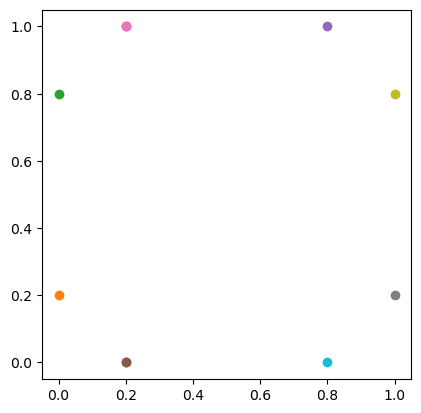

In [73]:
concern_points = list({0, 6, 43, 49, 87, 24, 25, 56, 93, 62})
fig, ax = plt.subplots()
# for i in range(len(centers)):
#     ax.scatter(x[:, i], y[:, i])
for idx, p in enumerate([quattro[i] for i in concern_points]):
    ax.scatter(p[0], p[1])
ax.set_aspect('equal')
plt.show()